In [132]:
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
## Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Shape of the Data

In [134]:
print(customers.shape)

(200, 4)


In [135]:
print(products.shape)

(100, 4)


In [136]:
print(transactions.shape)

(1000, 7)


# Preview the first 5 rows to understand the structure of the dataset

In [137]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [138]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [139]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


# check the data type 

In [140]:
customers.dtypes

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

In [141]:
# Convert SignupDate to datetime 
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [142]:
customers.dtypes

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

In [143]:
products.dtypes

ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

In [144]:
transactions.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

In [145]:
#Convert TransactionDate to datetime 
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [146]:
transactions.dtypes

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

# info 

In [147]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [148]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [149]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


# Check for missing values

In [150]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [151]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [152]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

# Check for duplicate rows in each dataset


In [153]:
customers.duplicated().sum()

0

In [154]:
products.duplicated().sum()

0

In [155]:
transactions.duplicated().sum()

0

# Get summary statistics for numerical columns

In [156]:
customers.describe()

,SignupDate
count,200
mean,2023-07-19 08:31:12
min,2022-01-22 00:00:00
25%,2022-09-26 12:00:00
50%,2023-08-31 12:00:00
75%,2024-04-12 12:00:00
max,2024-12-28 00:00:00


In [157]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [158]:
transactions.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


# Business Insights

In [159]:
# 1.Count of customers per region
customer_region_counts = customers['Region'].value_counts()
customer_region_counts

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

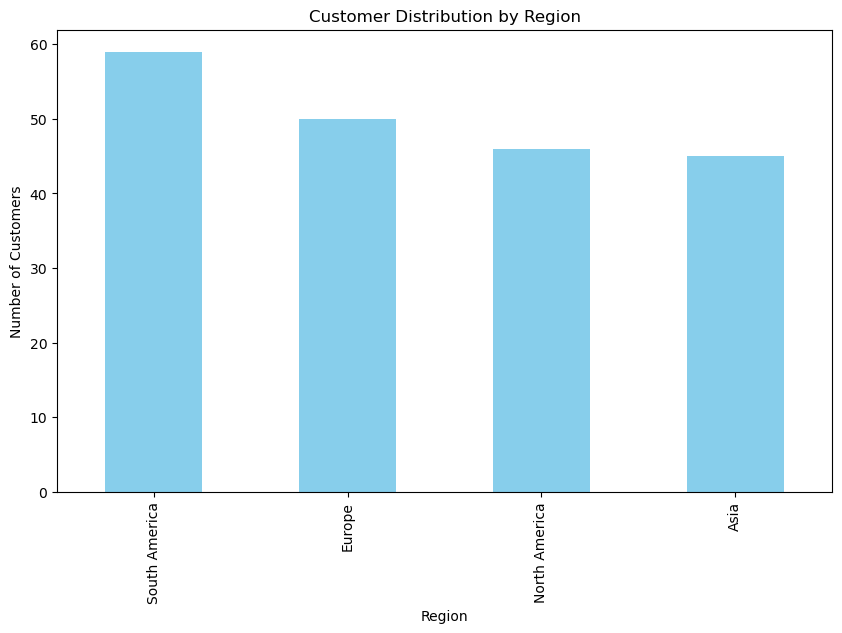

In [160]:
# Bar chart for customer distribution by region
customer_region_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

In [161]:
# 2. Distribution of signups over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
signup_trends

SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64

In [164]:
#3. Count of products per category
product_category_counts = products['Category'].value_counts()
product_category_counts

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

In [173]:
# 4. Total quantity sold by product
total_quantity_by_product = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)

In [174]:
total_quantity_by_product 

ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
        ..
P044    13
P060    13
P024    12
P099    11
P031     9
Name: Quantity, Length: 100, dtype: int64

ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


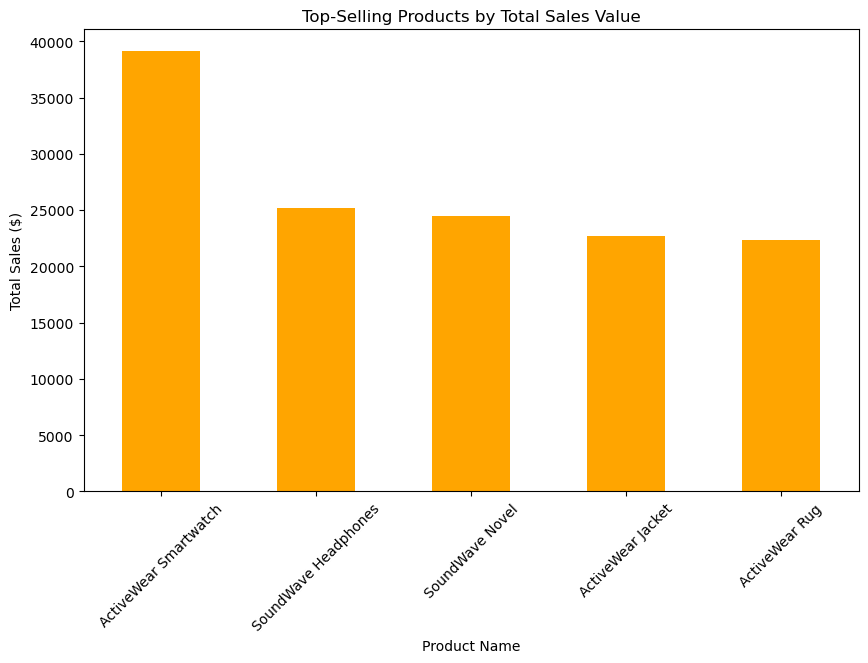

In [177]:
#5. Top-Selling Products:
transactions_with_names = pd.merge(transactions, products, on='ProductID')

# Calculate total sales value by product
total_sales_by_product = transactions_with_names.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)

# Display top-selling products
top_selling_products = total_sales_by_product.head(5)
print(top_selling_products)

# Plot the top-selling products
top_selling_products.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title("Top-Selling Products by Total Sales Value")
plt.xlabel("Product Name")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()
